In [7]:
!pip install seaborn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('coin_Bitcoin.csv', parse_dates=['Date'], index_col='Date')

In [3]:
data.head()

,SNo,Name,Symbol,High,Low,Open,Close,Volume,Marketcap
Date,,,,,,,,,
2013-04-29 23:59:59,1,Bitcoin,BTC,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09
2013-04-30 23:59:59,2,Bitcoin,BTC,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09
2013-05-01 23:59:59,3,Bitcoin,BTC,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09
2013-05-02 23:59:59,4,Bitcoin,BTC,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09
2013-05-03 23:59:59,5,Bitcoin,BTC,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09


In [4]:
data.dtypes

SNo            int64
Name          object
Symbol        object
High         float64
Low          float64
Open         float64
Close        float64
Volume       float64
Marketcap    float64
dtype: object

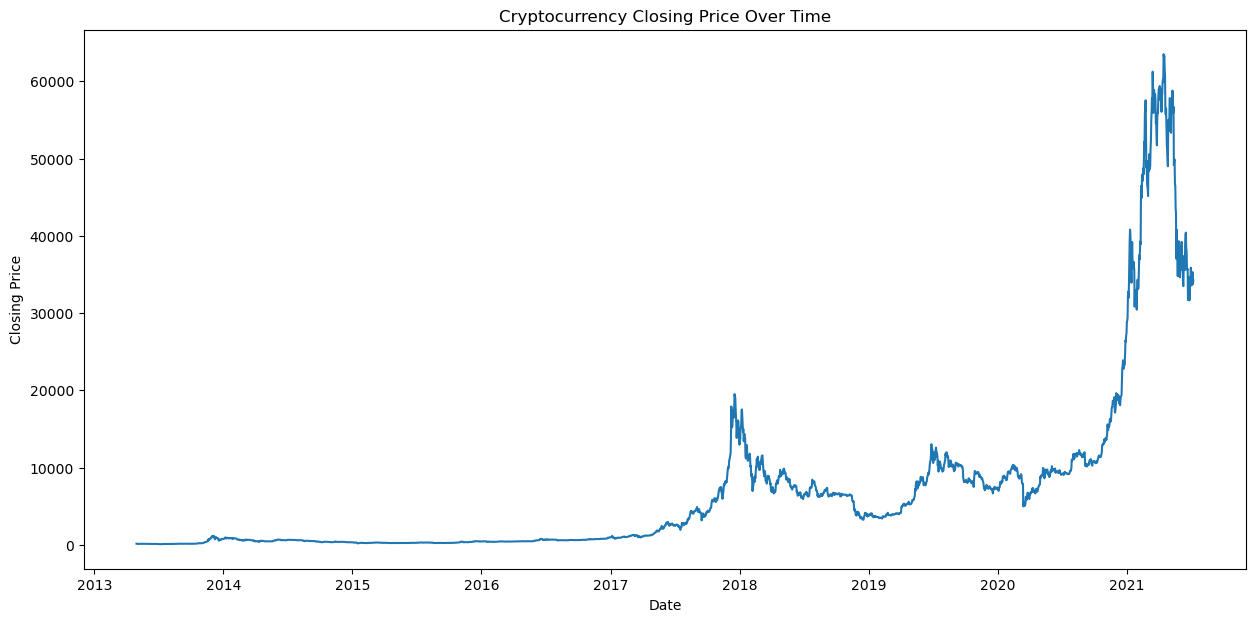

In [5]:
plt.figure(figsize=(15,7))
plt.plot(data['Close'])
plt.title('Cryptocurrency Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()

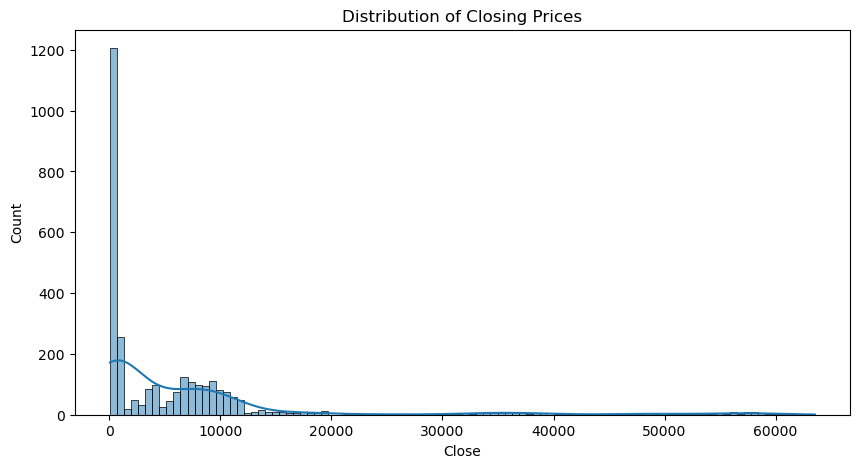

In [6]:
plt.figure(figsize=(10,5))
sns.histplot(data['Close'], bins=100, kde=True)
plt.title('Distribution of Closing Prices')
plt.show()

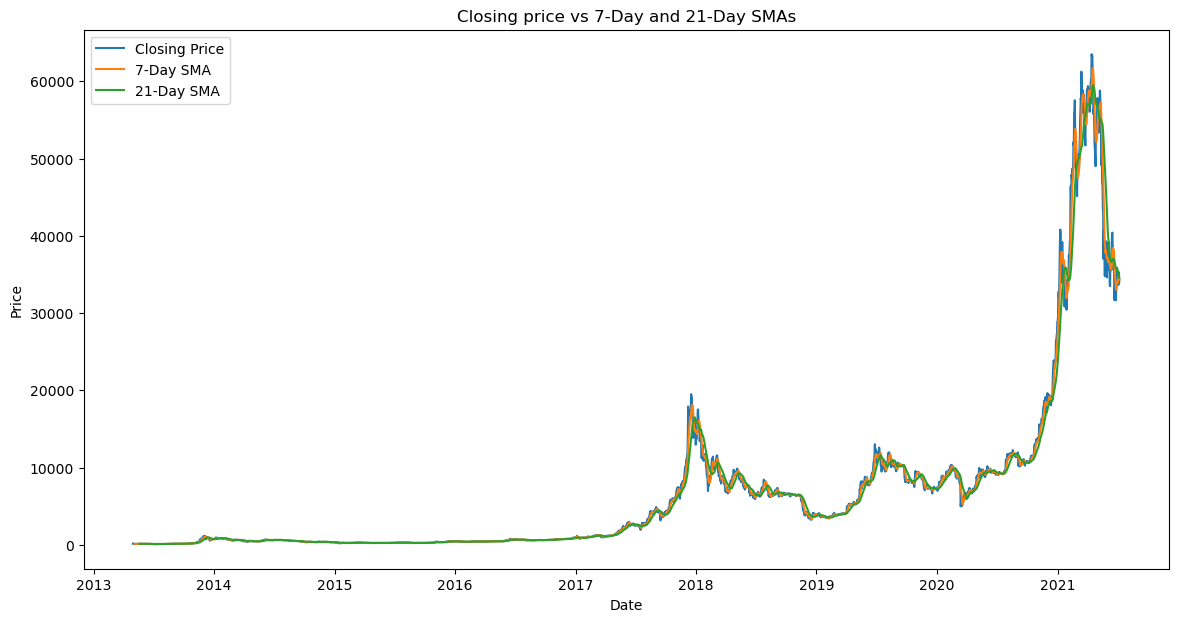

In [7]:
data['SMA_7'] = data['Close'].rolling(window=7).mean()
data['SMA_21'] = data['Close'].rolling(window=21).mean()

plt.figure(figsize=(14,7))
plt.plot(data['Close'], label='Closing Price')
plt.plot(data['SMA_7'], label='7-Day SMA')
plt.plot(data['SMA_21'], label='21-Day SMA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Closing price vs 7-Day and 21-Day SMAs')
plt.legend()
plt.show()

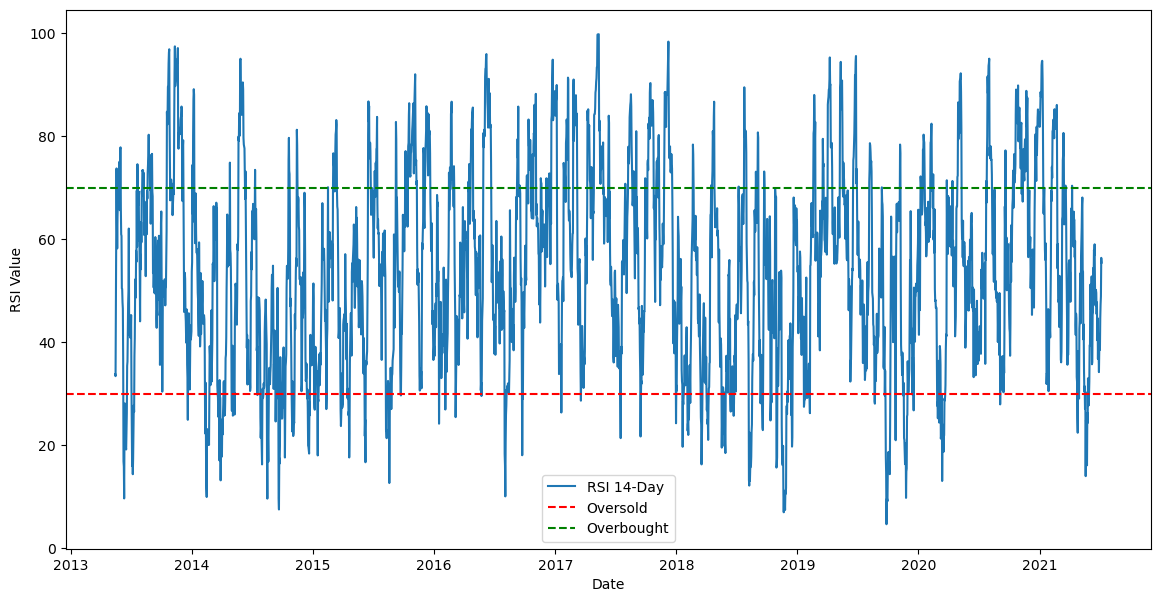

In [8]:
def calculate_RSI(series, period=14):
    delta = series.diff(1)
    delta = delta.dropna()
    up = delta.copy()
    down = delta.copy()
    up[up<0] = 0
    down[down>0] = 0
    gain = up.rolling(window=period).mean()
    loss = down.abs().rolling(window=period).mean()
    RS = gain / loss
    RSI = 100 - (100.0 / (1.0 + RS))
    return RSI
data['RSI_14'] = calculate_RSI(data['Close'])

plt.figure(figsize=(14,7))
plt.plot(data['RSI_14'], label='RSI 14-Day')
plt.axhline(30, color='red', linestyle='--', label='Oversold')
plt.axhline(70, color='green', linestyle='--', label='Overbought')
plt.xlabel('Date')
plt.ylabel('RSI Value')
plt.legend()
plt.show()

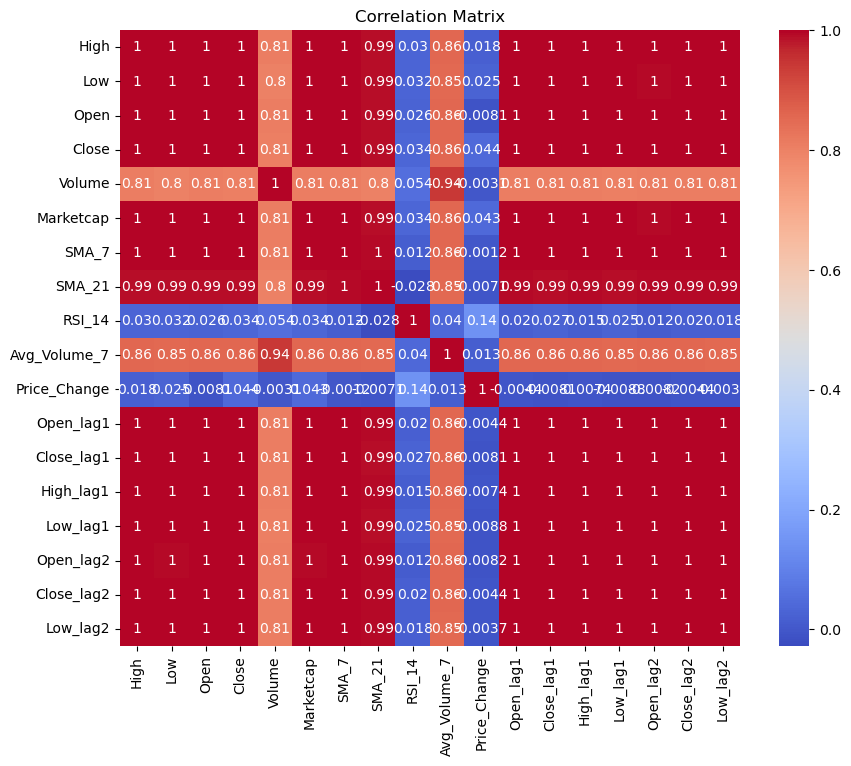

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

data['Avg_Volume_7'] = data['Volume'].rolling(window=7).mean()
data['Price_Change'] = data['Close'].diff()
data['Open_lag1'] = data['Open'].shift(1)
data['Close_lag1'] = data['Close'].shift(1)
data['High_lag1'] = data['High'].shift(1)
data['Low_lag1'] = data['Low'].shift(1)
data['Open_lag2'] = data['Open'].shift(2)
data['Close_lag2'] = data['Close'].shift(2)
data['High_lag1'] = data['High'].shift(2)
data['Low_lag2'] = data['Low'].shift(2)

data['Target'] = np.where(data['Close'].shift(-1) > data['Close'], 1, 0)
data = data.drop(['Name', 'SNo', 'Symbol'], axis=1)
data = data.dropna()
corr_matrix = data.drop(['Target'], axis=1).corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [10]:
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2971 entries, 2013-05-19 23:59:59 to 2021-07-06 23:59:59
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   High          2971 non-null   float64
 1   Low           2971 non-null   float64
 2   Open          2971 non-null   float64
 3   Close         2971 non-null   float64
 4   Volume        2971 non-null   float64
 5   Marketcap     2971 non-null   float64
 6   SMA_7         2971 non-null   float64
 7   SMA_21        2971 non-null   float64
 8   RSI_14        2971 non-null   float64
 9   Avg_Volume_7  2971 non-null   float64
 10  Price_Change  2971 non-null   float64
 11  Open_lag1     2971 non-null   float64
 12  Close_lag1    2971 non-null   float64
 13  High_lag1     2971 non-null   float64
 14  Low_lag1      2971 non-null   float64
 15  Open_lag2     2971 non-null   float64
 16  Close_lag2    2971 non-null   float64
 17  Low_lag2      2971 non-null   float

In [11]:
data.dtypes

High            float64
Low             float64
Open            float64
Close           float64
Volume          float64
Marketcap       float64
SMA_7           float64
SMA_21          float64
RSI_14          float64
Avg_Volume_7    float64
Price_Change    float64
Open_lag1       float64
Close_lag1      float64
High_lag1       float64
Low_lag1        float64
Open_lag2       float64
Close_lag2      float64
Low_lag2        float64
Target            int32
dtype: object

In [12]:
data.index = pd.to_datetime(data.index)
cutoff_date = '2020-01-01'

train_data = data[data.index < cutoff_date]
test_data = data[data.index >= cutoff_date]

In [13]:
features = data.drop(['Target'], axis=1).columns.tolist()
X_train = train_data[features]
y_train = train_data['Target']

X_test = test_data[features]
y_test = test_data['Target']

X_train = X_train.dropna()
y_train = y_train.loc[X_train.index]

X_test = X_test.dropna()
y_test = y_test.loc[X_test.index]

In [14]:
from sklearn.ensemble import RandomForestClassifier

In [15]:
from sklearn.model_selection import TimeSeriesSplit

tscv = TimeSeriesSplit(n_splits=5)


In [16]:
from sklearn.metrics import accuracy_score

rf_model = RandomForestClassifier(n_estimators=100, random_state=1)
cv_scores = []

for train_index, val_index in tscv.split(X_train):
    X_train_cv, X_val_cv = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_cv, y_val_cv = y_train.iloc[train_index], y_train.iloc[val_index]
    rf_model.fit(X_train_cv, y_train_cv)

    y_pred_cv = rf_model.predict(X_val_cv)
    score = accuracy_score(y_val_cv, y_pred_cv)
    cv_scores.append(score)

print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Accuracy: {np.mean(cv_scores):.4f}")

Cross-Validation Scores: [0.5086848635235732, 0.5037220843672456, 0.4292803970223325, 0.4665012406947891, 0.49379652605459057]
Mean CV Accuracy: 0.4804


Best Params: {'class_weight': 'balanced', 'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 200}


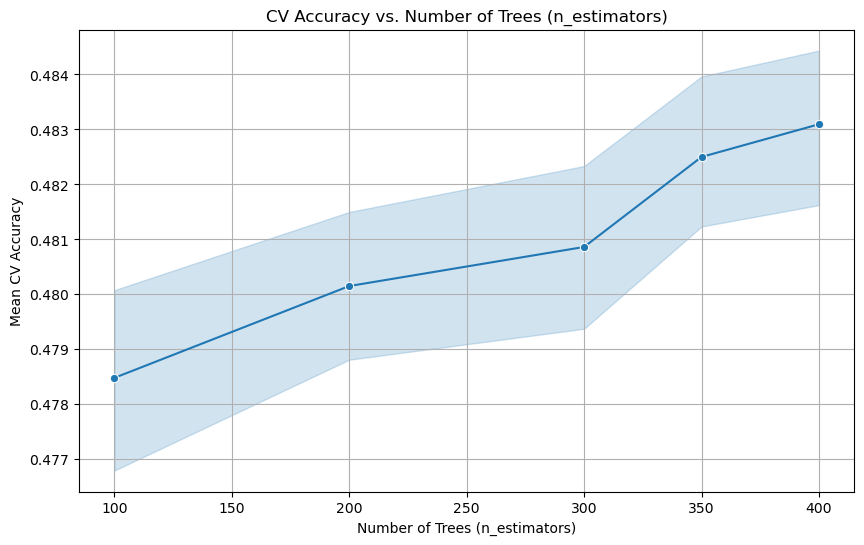

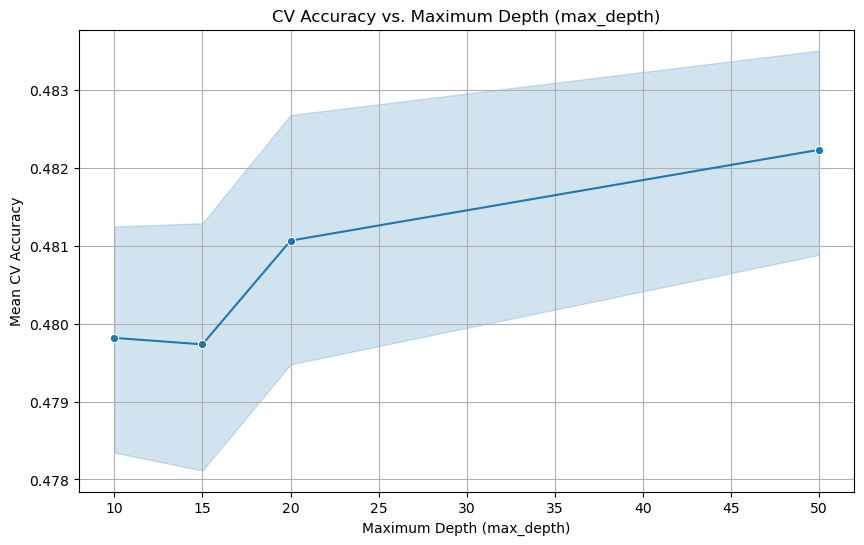

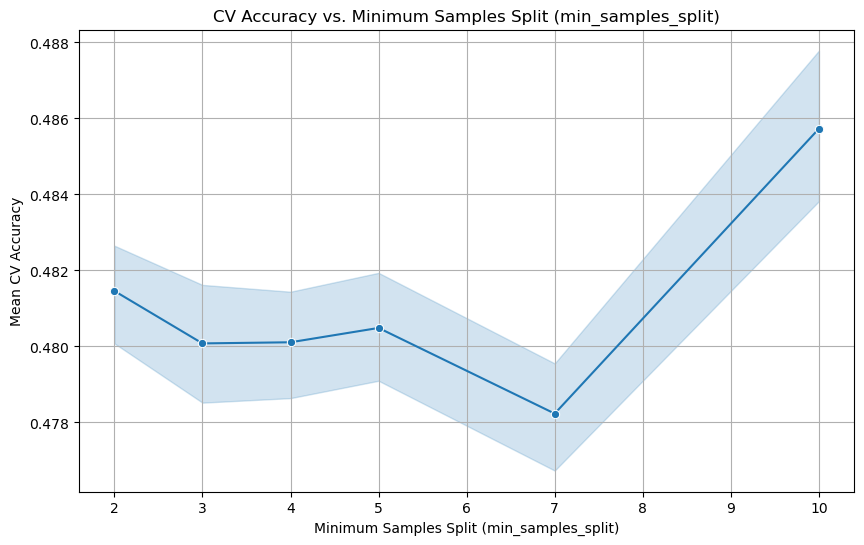

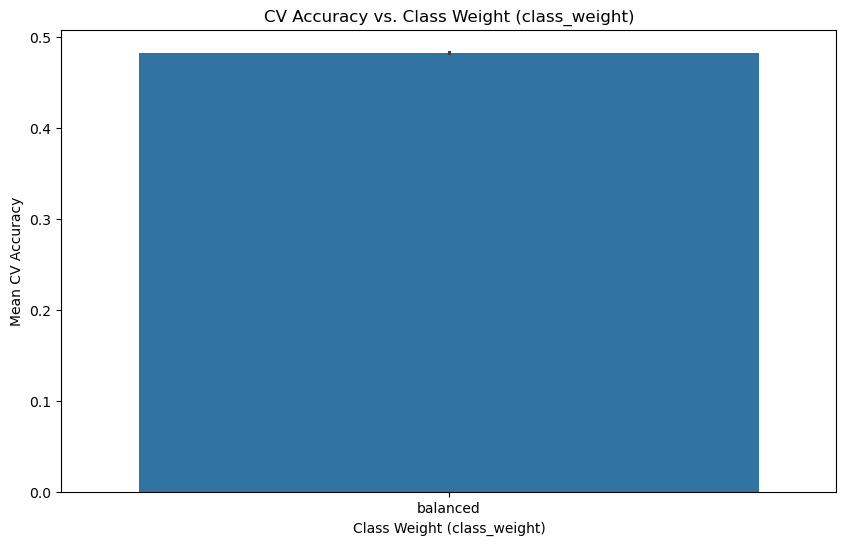

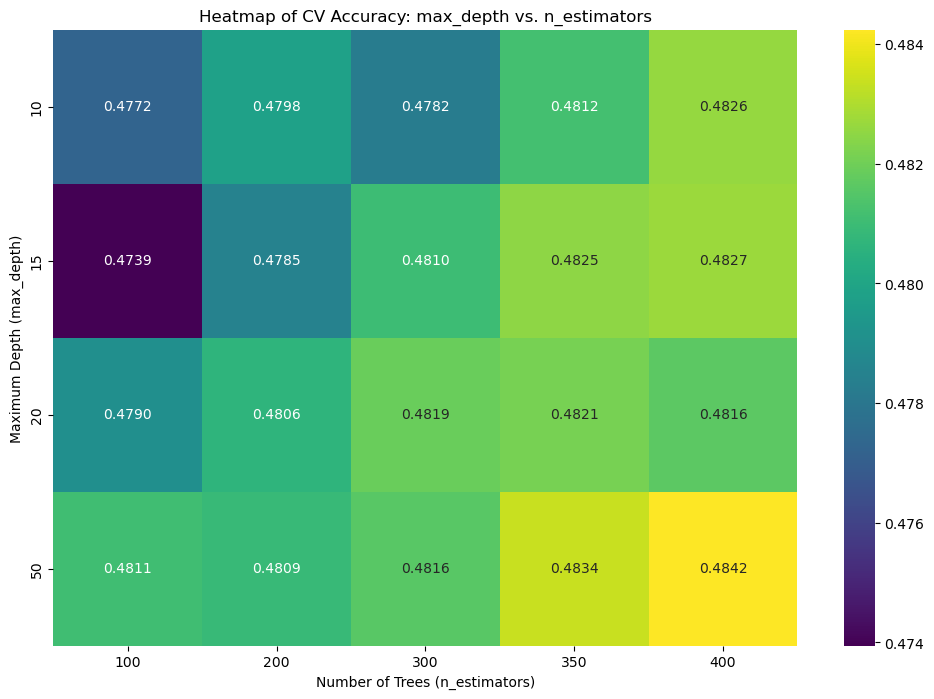

Best CV Accuracy: 0.5022
Best Parameters: {'class_weight': 'balanced', 'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 200}
Test Set Evaluation
              precision    recall  f1-score   support

           0       0.45      0.69      0.55       253
           1       0.53      0.30      0.38       300

    accuracy                           0.48       553
   macro avg       0.49      0.49      0.46       553
weighted avg       0.50      0.48      0.46       553

Confusion Matrix:
[[175  78]
 [211  89]]


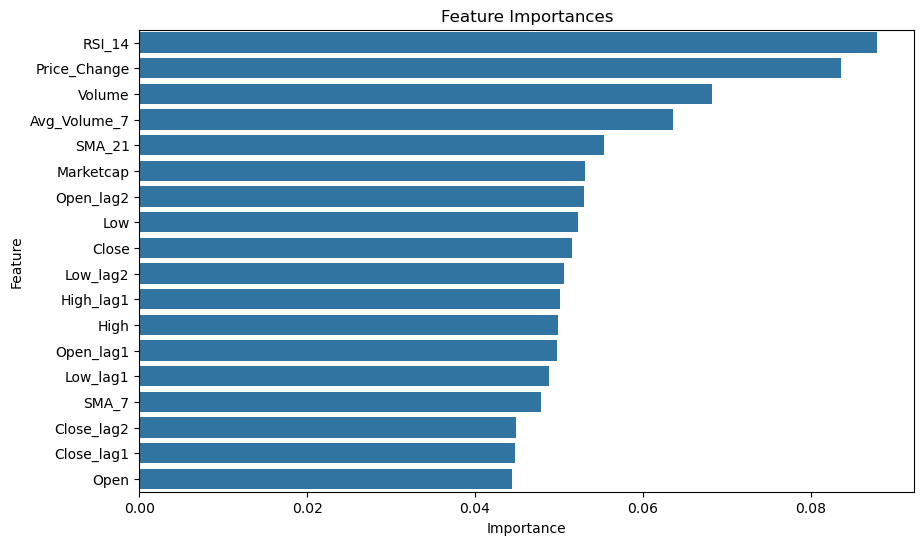

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

param_grid = {
    'n_estimators': [100, 200, 300, 400, 350],
    'max_depth': [None, 10, 15, 20, 50],
    'min_samples_split': [2, 3, 4, 5, 7, 10],
    'class_weight': [None, 'balanced']
}

tscv = TimeSeriesSplit(n_splits=5)

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=1),
    param_grid=param_grid,
    cv=tscv,
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print("Best Params:", grid_search.best_params_)
best_model = grid_search.best_estimator_

cv_results = pd.DataFrame(grid_search.cv_results_)

plt.figure(figsize=(10, 6))
sns.lineplot(x='param_n_estimators', y='mean_test_score', data=cv_results, marker='o')
plt.title('CV Accuracy vs. Number of Trees (n_estimators)')
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('Mean CV Accuracy')
plt.grid(True)
plt.savefig('cv_accuracy_n_estimators.png') 
plt.show()


plt.figure(figsize=(10, 6))
sns.lineplot(x='param_max_depth', y='mean_test_score', data=cv_results, marker='o')
plt.title('CV Accuracy vs. Maximum Depth (max_depth)')
plt.xlabel('Maximum Depth (max_depth)')
plt.ylabel('Mean CV Accuracy')
plt.grid(True)
plt.savefig('cv_accuracy_max_depth.png')
plt.show()

plt.figure(figsize=(10, 6))
sns.lineplot(x='param_min_samples_split', y='mean_test_score', data=cv_results, marker='o')
plt.title('CV Accuracy vs. Minimum Samples Split (min_samples_split)')
plt.xlabel('Minimum Samples Split (min_samples_split)')
plt.ylabel('Mean CV Accuracy')
plt.grid(True)
plt.savefig('cv_accuracy_min_samples_split.png')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='param_class_weight', y='mean_test_score', data=cv_results)
plt.title('CV Accuracy vs. Class Weight (class_weight)')
plt.xlabel('Class Weight (class_weight)')
plt.ylabel('Mean CV Accuracy')
plt.savefig('cv_accuracy_class_weight.png')
plt.show()

pivot_table = cv_results.pivot_table(
    index='param_max_depth',
    columns='param_n_estimators',
    values='mean_test_score'
)

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt=".4f", cmap='viridis')
plt.title('Heatmap of CV Accuracy: max_depth vs. n_estimators')
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('Maximum Depth (max_depth)')
plt.savefig('heatmap_max_depth_n_estimators.png')
plt.show()

best_score = grid_search.best_score_
print(f"Best CV Accuracy: {best_score:.4f}")
print("Best Parameters:", grid_search.best_params_)

y_pred_test = best_model.predict(X_test)
print("Test Set Evaluation")
print(classification_report(y_test, y_pred_test))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_test))

importances = best_model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.savefig('feature_importances.png')
plt.show()


In [18]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred_test = best_model.predict(X_test)
print("Test Set Evaluation")
print(classification_report(y_test, y_pred_test))
print(confusion_matrix(y_test, y_pred_test))

Test Set Evaluation
              precision    recall  f1-score   support

           0       0.45      0.69      0.55       253
           1       0.53      0.30      0.38       300

    accuracy                           0.48       553
   macro avg       0.49      0.49      0.46       553
weighted avg       0.50      0.48      0.46       553

[[175  78]
 [211  89]]


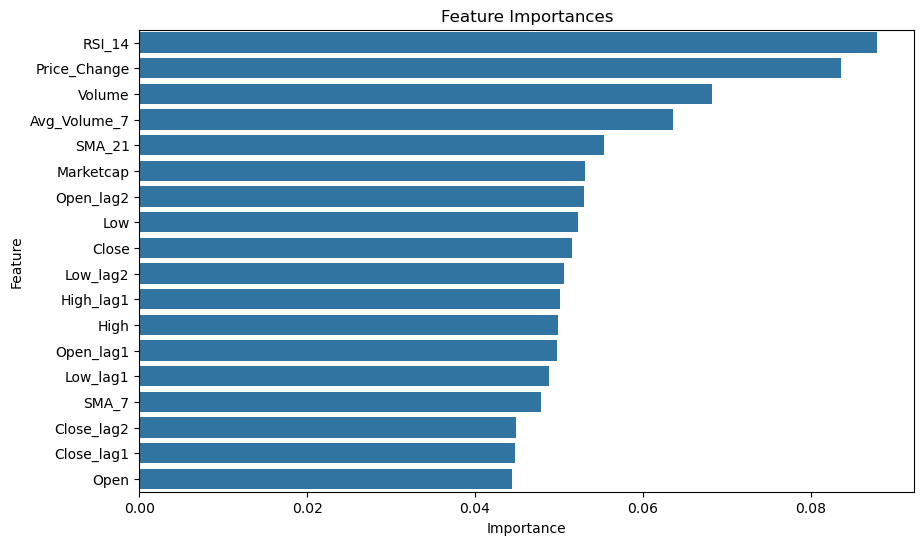

In [19]:
importances = best_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})
feature_importance_df.sort_values('Importance', ascending=False, inplace=True)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances')
plt.show()
